In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("PEA11.20231025T121029.csv")

In [3]:
data.head()

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
0,Population estimates from 1926,1926,All ages,Both sexes,Number,2971992
1,Population estimates from 1926,1926,All ages,Male,Number,1506889
2,Population estimates from 1926,1926,All ages,Female,Number,1465103
3,Population estimates from 1926,1926,Under 1 year,Both sexes,Number,55391
4,Population estimates from 1926,1926,Under 1 year,Male,Number,28084


In [4]:
data.tail

<bound method NDFrame.tail of                       STATISTIC Label  Year Single Year of Age         Sex  \
0      Population estimates from 1926  1926           All ages  Both sexes   
1      Population estimates from 1926  1926           All ages        Male   
2      Population estimates from 1926  1926           All ages      Female   
3      Population estimates from 1926  1926       Under 1 year  Both sexes   
4      Population estimates from 1926  1926       Under 1 year        Male   
...                               ...   ...                ...         ...   
11812  Population estimates from 1926  2023           98 years        Male   
11813  Population estimates from 1926  2023           98 years      Female   
11814  Population estimates from 1926  2023  99 years and over  Both sexes   
11815  Population estimates from 1926  2023  99 years and over        Male   
11816  Population estimates from 1926  2023  99 years and over      Female   

         UNIT    VALUE  
0      N

In [5]:
data.info

<bound method DataFrame.info of                       STATISTIC Label  Year Single Year of Age         Sex  \
0      Population estimates from 1926  1926           All ages  Both sexes   
1      Population estimates from 1926  1926           All ages        Male   
2      Population estimates from 1926  1926           All ages      Female   
3      Population estimates from 1926  1926       Under 1 year  Both sexes   
4      Population estimates from 1926  1926       Under 1 year        Male   
...                               ...   ...                ...         ...   
11812  Population estimates from 1926  2023           98 years        Male   
11813  Population estimates from 1926  2023           98 years      Female   
11814  Population estimates from 1926  2023  99 years and over  Both sexes   
11815  Population estimates from 1926  2023  99 years and over        Male   
11816  Population estimates from 1926  2023  99 years and over      Female   

         UNIT    VALUE  
0     

In [6]:
data.shape

(11817, 6)

In [7]:
data.describe()

,Year,VALUE
count,11817.000000,1.181700e+04
mean,1996.410256,5.352461e+04
std,24.463165,2.867754e+05
min,1926.000000,6.000000e+00
25%,1986.000000,1.242700e+04
50%,2004.000000,2.667500e+04
75%,2014.000000,3.557700e+04
max,2023.000000,5.281612e+06


In [8]:
data.isnull().sum()

STATISTIC Label       0
Year                  0
Single Year of Age    0
Sex                   0
UNIT                  0
VALUE                 0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11817 entries, 0 to 11816
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC Label     11817 non-null  object
 1   Year                11817 non-null  int64 
 2   Single Year of Age  11817 non-null  object
 3   Sex                 11817 non-null  object
 4   UNIT                11817 non-null  object
 5   VALUE               11817 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 554.0+ KB


In [10]:
data["Single Year of Age"].unique()

array(['All ages', 'Under 1 year', '1 year', '2 years', '3 years',
       '4 years', '5 years', '6 years', '7 years', '8 years', '9 years',
       '10 years', '11 years', '12 years', '13 years', '14 years',
       '15 years', '16 years', '17 years', '18 years', '19 years',
       '20 years', '21 years', '22 years', '23 years', '24 years',
       '25 years', '26 years', '27 years', '28 years', '29 years',
       '30 years', '31 years', '32 years', '33 years', '34 years',
       '35 years', '36 years', '37 years', '38 years', '39 years',
       '40 years', '41 years', '42 years', '43 years', '44 years',
       '45 years', '46 years', '47 years', '48 years', '49 years',
       '50 years', '51 years', '52 years', '53 years', '54 years',
       '55 years', '56 years', '57 years', '58 years', '59 years',
       '60 years', '61 years', '62 years', '63 years', '64 years',
       '65 years', '66 years', '67 years', '68 years', '69 years',
       '70 years', '71 years', '72 years', '73 years', '

In [11]:
values_to_remove =["All ages"]
data = data[~data["Single Year of Age"].isin(values_to_remove)]

In [12]:
##也可以用Drop来实现，但是实现的过程更复杂一些
##values_to_remove =["All ages"]
##indices_to_remove = df[df["Single Year of Age"].isin(values_to_remove)].index
##df =df.drop(indices_to_remove)

In [13]:
#ages = data["Single Year of Age"].unique()

#for i in ages:
    #if i[:1] == "U":
        #data.loc[data["Single Year of Age"] =="Under 1 year","Single Year of Age"] = 0.5
        #data["Single Year of Age"].replace("U",0.5,inplace = True)
    #else:
        #data.loc[data["Single Year of Age"] == i,"Single Year of Age"] = int(i[:2])
        #data["Single Year of Age"].replace(i,int(i[:2]),inplace = True)


#C:\Users\luozh\anaconda3\envs\py36\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning:         
#A value is trying to be set on a copy of a slice from a DataFrame.
#Try using .loc[row_indexer,col_indexer] = value instead
#See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
#isetter(loc, value)

In [14]:
class AgeDataProcessor:
    def __init__(self,data):
        self.data = data
        self.ages = data["Single Year of Age"].unique()
    
    def process_ages(self):
        for i in self.ages:
            if i[:1] == "U":
                self.data.loc[self.data["Single Year of Age"] =="Under 1 year","Single Year of Age"] = 0.5
            else:
                self.data.loc[self.data["Single Year of Age"] == i,"Single Year of Age"] = int(i[:2])
processor = AgeDataProcessor(data)
processor.process_ages()
print(data)

                      STATISTIC Label  Year Single Year of Age         Sex  \
3      Population estimates from 1926  1926                0.5  Both sexes   
4      Population estimates from 1926  1926                0.5        Male   
5      Population estimates from 1926  1926                0.5      Female   
6      Population estimates from 1926  1926                  1  Both sexes   
7      Population estimates from 1926  1926                  1        Male   
...                               ...   ...                ...         ...   
11812  Population estimates from 1926  2023                 98        Male   
11813  Population estimates from 1926  2023                 98      Female   
11814  Population estimates from 1926  2023                 99  Both sexes   
11815  Population estimates from 1926  2023                 99        Male   
11816  Population estimates from 1926  2023                 99      Female   

         UNIT  VALUE  
3      Number  55391  
4      Number  28

C:\Users\luozh\anaconda3\envs\py36\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [15]:
data["Single Year of Age"]

3        0.5
4        0.5
5        0.5
6          1
7          1
        ... 
11812     98
11813     98
11814     99
11815     99
11816     99
Name: Single Year of Age, Length: 11700, dtype: object

In [16]:
data

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
3,Population estimates from 1926,1926,0.5,Both sexes,Number,55391
4,Population estimates from 1926,1926,0.5,Male,Number,28084
5,Population estimates from 1926,1926,0.5,Female,Number,27307
6,Population estimates from 1926,1926,1,Both sexes,Number,55876
7,Population estimates from 1926,1926,1,Male,Number,28374
...,...,...,...,...,...,...
11812,Population estimates from 1926,2023,98,Male,Number,197
11813,Population estimates from 1926,2023,98,Female,Number,632
11814,Population estimates from 1926,2023,99,Both sexes,Number,1600
11815,Population estimates from 1926,2023,99,Male,Number,352


In [17]:
from sklearn.preprocessing import OneHotEncoder

ohot = OneHotEncoder(sparse = False)

ohot.fit_transform(data[["Sex"]])

data = pd.get_dummies(data,prefix = "Sex",columns = ["Sex"])

data

,STATISTIC Label,Year,Single Year of Age,UNIT,VALUE,Sex_Both sexes,Sex_Female,Sex_Male
3,Population estimates from 1926,1926,0.5,Number,55391,1,0,0
4,Population estimates from 1926,1926,0.5,Number,28084,0,0,1
5,Population estimates from 1926,1926,0.5,Number,27307,0,1,0
6,Population estimates from 1926,1926,1,Number,55876,1,0,0
7,Population estimates from 1926,1926,1,Number,28374,0,0,1
...,...,...,...,...,...,...,...,...
11812,Population estimates from 1926,2023,98,Number,197,0,0,1
11813,Population estimates from 1926,2023,98,Number,632,0,1,0
11814,Population estimates from 1926,2023,99,Number,1600,1,0,0
11815,Population estimates from 1926,2023,99,Number,352,0,0,1


In [18]:
data = data.reset_index(drop=True)

In [19]:
data

,STATISTIC Label,Year,Single Year of Age,UNIT,VALUE,Sex_Both sexes,Sex_Female,Sex_Male
0,Population estimates from 1926,1926,0.5,Number,55391,1,0,0
1,Population estimates from 1926,1926,0.5,Number,28084,0,0,1
2,Population estimates from 1926,1926,0.5,Number,27307,0,1,0
3,Population estimates from 1926,1926,1,Number,55876,1,0,0
4,Population estimates from 1926,1926,1,Number,28374,0,0,1
...,...,...,...,...,...,...,...,...
11695,Population estimates from 1926,2023,98,Number,197,0,0,1
11696,Population estimates from 1926,2023,98,Number,632,0,1,0
11697,Population estimates from 1926,2023,99,Number,1600,1,0,0
11698,Population estimates from 1926,2023,99,Number,352,0,0,1


In [20]:
data.drop(["STATISTIC Label","UNIT"],axis = 1,inplace = True)

In [21]:
data =data[["Year","Single Year of Age","Sex_Both sexes","Sex_Female","Sex_Male","VALUE"]]

In [22]:
data

,Year,Single Year of Age,Sex_Both sexes,Sex_Female,Sex_Male,VALUE
0,1926,0.5,1,0,0,55391
1,1926,0.5,0,0,1,28084
2,1926,0.5,0,1,0,27307
3,1926,1,1,0,0,55876
4,1926,1,0,0,1,28374
...,...,...,...,...,...,...
11695,2023,98,0,0,1,197
11696,2023,98,0,1,0,632
11697,2023,99,1,0,0,1600
11698,2023,99,0,0,1,352


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                11700 non-null  int64 
 1   Single Year of Age  11700 non-null  object
 2   Sex_Both sexes      11700 non-null  uint8 
 3   Sex_Female          11700 non-null  uint8 
 4   Sex_Male            11700 non-null  uint8 
 5   VALUE               11700 non-null  int64 
dtypes: int64(2), object(1), uint8(3)
memory usage: 308.6+ KB


In [24]:
data

,Year,Single Year of Age,Sex_Both sexes,Sex_Female,Sex_Male,VALUE
0,1926,0.5,1,0,0,55391
1,1926,0.5,0,0,1,28084
2,1926,0.5,0,1,0,27307
3,1926,1,1,0,0,55876
4,1926,1,0,0,1,28374
...,...,...,...,...,...,...
11695,2023,98,0,0,1,197
11696,2023,98,0,1,0,632
11697,2023,99,1,0,0,1600
11698,2023,99,0,0,1,352


In [25]:
age_group= data.groupby("Single Year of Age")["VALUE"].sum()

In [26]:
type(age_group)

pandas.core.series.Series

In [27]:
age_group_df = age_group.reset_index()

In [28]:
age_group_df

,Single Year of Age,VALUE
0,0.5,4817598
1,1.0,4772532
2,2.0,4757252
3,3.0,4773920
4,4.0,4784288
...,...,...
95,95.0,68764
96,96.0,47800
97,97.0,34112
98,98.0,23574


In [29]:
bins = range(0, 110, 10)
labels = [f"{i}-{i+9}" for i in range(0, 100, 10)]
age_group_df['Single Year of Age'] = pd.cut(age_group_df['Single Year of Age'], bins=bins, labels=labels, right=False)

In [30]:
grouped_population = age_group_df.groupby('Single Year of Age')['VALUE'].sum()

In [31]:
grouped_population =grouped_population.reset_index()

In [32]:
["VALUE"]

['VALUE']

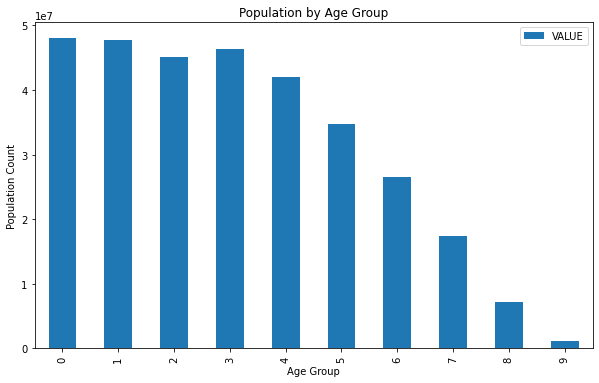

In [33]:
grouped_population.plot(kind='bar', figsize=(10, 6))
plt.title('Population by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Population Count')
plt.show()